<a href="https://colab.research.google.com/github/Tahahaha7/Capstone_Project/blob/master/Capstone_NHS_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# $\text{NHS statistics of Response Time}$

In [7]:
link = 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2021/03/AmbSYS-to-Feb-2021.csv'

In [10]:
nhs_data = pd.read_csv(link, squeeze = True)

In [11]:
measurements = ['incidents_count', 'total_seconds', 'rt_mean', '90th']
categories = ['C1', 'C1T', 'C2', 'C3', 'C4']
colnames = []
for cat in categories:
    for m in measurements:
        colnames.append(cat+'_'+m)

calls = ['contact_call', 'calls_answered', 'total_call_answer_time',  
         'mean_call_answer_time', 'median_call_answer_time',    
         '90th_call_answer_time', '95th_call_answer_time', '99th_call_answer_time']

codes = ['A8', 'A24', 'A25', 'A26', 'A9', 'A27', 'A28', 'A29', 'A10', 'A30', 
         'A31', 'A32', 'A11', 'A33', 'A34', 'A35', 'A12', 'A36', 'A37', 'A38',
         'A0', 'A1', 'A2', 'A3', 'A4', 'A114', 'A5', 'A6']

nhs_data = nhs_data.rename(columns=dict(zip(codes, colnames+calls)))

In [12]:
nhs_data = nhs_data[['Year', 'Month', 'Region', 'Org Code', 'Org Name']+colnames+calls]

In [13]:
nhs_data.Region.unique()

array(['Eng', 'North East and Yorkshire', 'North West', 'Midlands',
       'East of England', 'London', 'South East', 'South West', 'Y60',
       'Y61', 'Y59', 'Y56', 'Y63', 'Y62', 'Y58'], dtype=object)

In [14]:
# No data for the response time at the borough level
# The idea is to not peak into the distribution of respose time but only the count of incident for each category
# The objective is to match the historical data distribution based on the simulation output

In [15]:
nhs_london = nhs_data[nhs_data['Org Name']=='LONDON AMBULANCE SERVICE NHS TRUST']
nhs_london = nhs_london.reset_index(drop=True)
nhs_london = nhs_london.replace('.', np.nan)
#nhs_london = nhs_london.dropna()
nhs_london = nhs_london.apply(pd.to_numeric, errors='ignore')
nhs_london.insert(0, 'Time', pd.to_datetime(dict(year=nhs_london.Year, month=nhs_london.Month, day=1)))

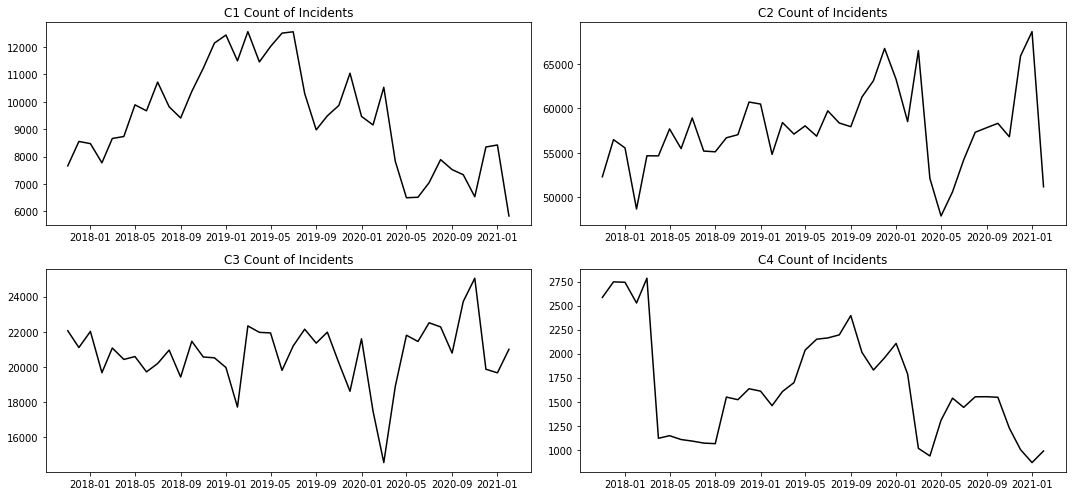

In [ ]:
plt.figure(figsize=(15, 7))
for idx, i in enumerate(['C1', 'C2', 'C3', 'C4']):
    plt.subplot(2, 2, idx+1)
    plt.title(i+' Count of Incidents')
    plt.plot(nhs_london.Time, nhs_london[i+'_incidents_count'], 'k')
plt.tight_layout();

In [ ]:
nhs_london.head()

In [ ]:
nhs_london[nhs_london.Time == '2019-01-01']#[['C1_rt_mean', 'C1_90th', 'C2_rt_mean', 'C2_90th', 'C3_rt_mean', 'C3_90th', 'C4_rt_mean', 'C4_90th']]

,Time,Year,Month,Region,Org Code,Org Name,C1_incidents_count,C1_total_seconds,C1_rt_mean,C1_90th,C1T_incidents_count,C1T_total_seconds,C1T_rt_mean,C1T_90th,C2_incidents_count,C2_total_seconds,C2_rt_mean,C2_90th,C3_incidents_count,C3_total_seconds,C3_rt_mean,C3_90th,C4_incidents_count,C4_total_seconds,C4_rt_mean,C4_90th,contact_call,calls_answered,total_call_answer_time,mean_call_answer_time,median_call_answer_time,90th_call_answer_time,95th_call_answer_time,99th_call_answer_time
17,2019-01-01,2019,1,Y56,RRU,LONDON AMBULANCE SERVICE NHS TRUST,12441.0,4738155.0,381.0,630.0,9478.0,6635218.0,700.0,1212.0,60485.0,78392824.0,1296.0,2769.0,19972.0,78364425.0,3924.0,9709.0,1610.0,7011919.0,4355.0,10285.0,171966.0,138775.0,942013.0,7.0,0.0,NaN,52.0,116.0


In [4]:
#12441 + 9478 + 60485 + 19972 + 1610, 171966, 138775

(sum([4738155+78392824+78364425+7011919+6635218]) / sum([12441, 60485, 19972, 1610, 9478])) % 60

4.289625526513191

In [6]:
9478 / 60485

0.15670000826651237

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# changing the working directory
%cd /content/gdrive/My Drive/Capstone

Mounted at /content/gdrive
/content/gdrive/My Drive/Capstone


In [ ]:
nhs_london.to_csv('nhs_london_stats.csv', index=False)

## $\text{Exploratory Data Analysis}$

In [ ]:
# create an interactive tab for selecting normals for all categories
# normal are constructed based on the mean and 90th of each category